In [1]:
# TOP 8 FREQUENT SCAFFOLDS IN NCI-60

#Importing Libraries

import os
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem.Scaffolds import MurckoScaffold
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#Reading NCI-60 dataset into a pandas dataframe

df = pd.read_csv("/home/dell11/scaffolds/NCI_60_activity.csv", sep=',')
print(f"Shape of dataframe: {df.shape}\n")

Shape of dataframe: (47196, 2)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47196 entries, 0 to 47195
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   smiles    47196 non-null  object
 1   Activity  47196 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 737.6+ KB


In [4]:
df.head(3).dropna()

,smiles,Activity
0,CC1CNC(=O)C(NC(=O)C=CCC(OC(=O)C(OC1=O)CC(C)C)C...,1
1,CC1CC2CCC3C(=C)CC(O3)CCC45CC6C(O4)C7C(O6)C(O5)...,1
2,CCN(CC)C1=CC2=C(C=C1)C=C(O2)C(=O)NC3=CC4=C(C=C...,1


[22:57:59] Explicit valence for atom # 4 Sn, 5, is greater than permitted
[22:57:59] Explicit valence for atom # 4 Sn, 5, is greater than permitted
[22:58:04] WARNING: not removing hydrogen atom without neighbors


,smiles,Activity,ROMol
0,CC1CNC(=O)C(NC(=O)C=CCC(OC(=O)C(OC1=O)CC(C)C)C...,1,
1,CC1CC2CCC3C(=C)CC(O3)CCC45CC6C(O4)C7C(O6)C(O5)...,1,
2,CCN(CC)C1=CC2=C(C=C1)C=C(O2)C(=O)NC3=CC4=C(C=C...,1,

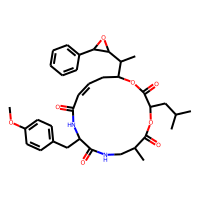
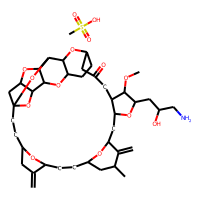
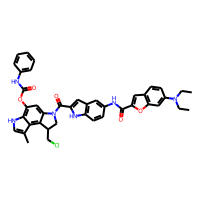

In [5]:
PandasTools.AddMoleculeColumnToFrame(df, 'smiles')
df.head(3)

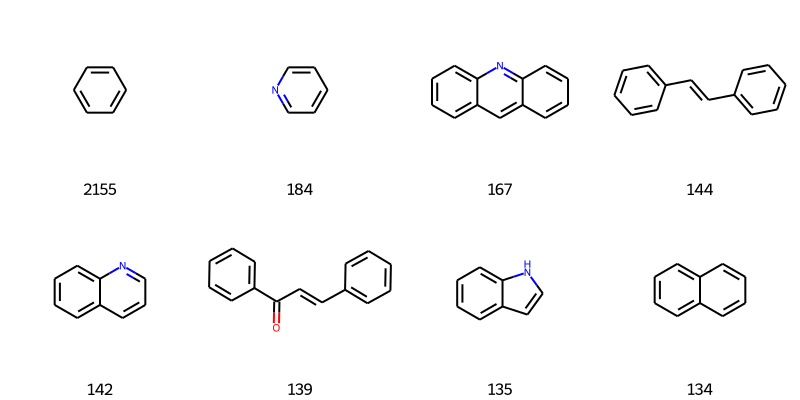

In [6]:
# Finding Murcko Scaffolds
df = df[~df['ROMol'].isnull()]
PandasTools.AddMurckoToFrame(df)
st_Scaffolds = df.groupby(['Murcko_SMILES']).count().sort_values('smiles', ascending=False)
st_Scaffolds = st_Scaffolds[['smiles']] 
st_Scaffolds = st_Scaffolds.rename(columns={'smiles':'count'})
st_Scaffolds['Murcko_SMILES'] = st_Scaffolds.index 
PandasTools.AddMoleculeColumnToFrame(st_Scaffolds, smilesCol='Murcko_SMILES')
PandasTools.FrameToGridImage(st_Scaffolds.dropna().head(8), legendsCol='count', molsPerRow=4)